In [1]:
import numpy as np

import random

import cv2

import matplotlib.pyplot as plt

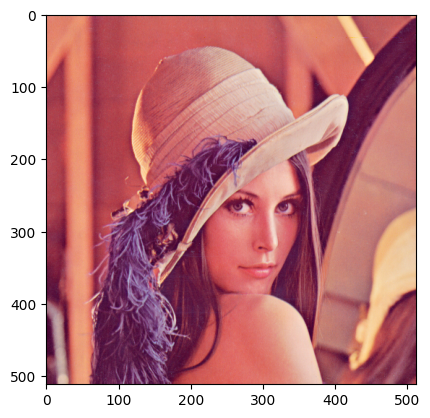

In [2]:
#img_BGR = cv2.imread("Introduction to openCV/lena.png")

img_BGR = cv2.imread("Introduction to OpenCV/lena.png")

img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [3]:
img.shape

(512, 512, 3)

In [4]:
m = img.shape[0]

n = img.shape[1]

c = img.shape[2]

# Convolution

### Filter only central areas of the image

In [5]:
conv_center = np.zeros((m, n, 3), dtype="int32")

In [6]:
k = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

k

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [7]:
for i in range(1, m-2):
    for j in range(1, n-2):
        subpatch = img[i-1:i+2, j-1:j+2]
        res = subpatch*k
        summation = np.sum(res)
        conv_center[i, j] = summation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2001..1849].


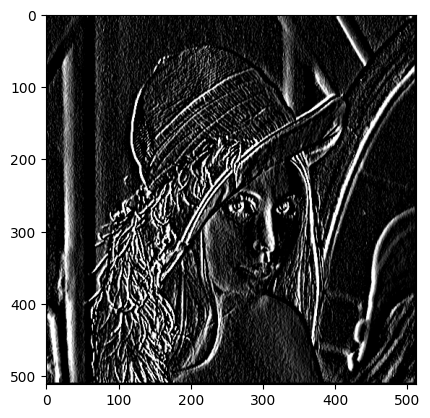

In [8]:
plt.imshow(conv_center)

### Assume that all around the input image there is 0

In [9]:
pad_zero = np.zeros((m+2, n+2, 3), dtype ="int32")

In [10]:
for i in range(1, m+1):
    for j in range(1,n+1):
        pad_zero[i, j] = img[i-1,j-1]

In [11]:
conv_zero = np.zeros((m, n, 3), dtype = "int32")

In [12]:
for i in range(m):
    for j in range(n):
        subpatch = pad_zero[i:i+3, j:j+3]
        res = subpatch*k
        summation = np.sum(res)
        conv_zero[i,j] = summation 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2493..1983].


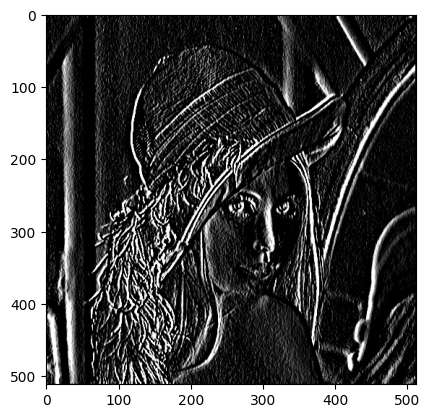

In [13]:
plt.imshow(conv_zero)

In [14]:
conv_zero[0:, :, :]

array([[[ 1250,  1250,  1250],
        [   10,    10,    10],
        [   -4,    -4,    -4],
        ...,
        [ -128,  -128,  -128],
        [ -320,  -320,  -320],
        [-1182, -1182, -1182]],

       [[ 1875,  1875,  1875],
        [   15,    15,    15],
        [   -6,    -6,    -6],
        ...,
        [ -192,  -192,  -192],
        [ -480,  -480,  -480],
        [-1773, -1773, -1773]],

       [[ 1875,  1875,  1875],
        [   15,    15,    15],
        [   -6,    -6,    -6],
        ...,
        [ -192,  -192,  -192],
        [ -480,  -480,  -480],
        [-1773, -1773, -1773]],

       ...,

       [[  555,   555,   555],
        [   73,    73,    73],
        [   58,    58,    58],
        ...,
        [    6,     6,     6],
        [  -28,   -28,   -28],
        [-1165, -1165, -1165]],

       [[  546,   546,   546],
        [  102,   102,   102],
        [   69,    69,    69],
        ...,
        [   35,    35,    35],
        [    9,     9,     9],
        [-1192,

### Fill in the added rows and colums in a TOROIDAL manner

In [15]:
pad_tor = np.zeros((m+2, n+2, 3), dtype ="int32")

In [16]:
for i in range(1, m+1):
    for j in range(1,n+1):
        pad_tor[i, j] = img[i-1,j-1]

In [17]:
pad_tor[0, :] = pad_tor[m, :]

pad_tor[m+1, :] = pad_tor[1, :]

pad_tor[:, 0] = pad_tor[:, n]

pad_tor[:, n+1] = pad_tor[:, 1]

In [18]:
pad_tor[:, 0]

array([[185,  74,  81],
       [200,  99,  90],
       [200,  99,  90],
       ...,
       [185,  74,  81],
       [185,  74,  81],
       [200,  99,  90]], dtype=int32)

In [19]:
conv_tor = np.zeros((m, n, 3), dtype = "int32")

In [20]:
for i in range(m):
    for j in range(n):
        subpatch = pad_tor[i:i+3, j:j+3]
        res = subpatch*k
        summation = np.sum(res)
        conv_tor[i,j] = summation 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2001..1849].


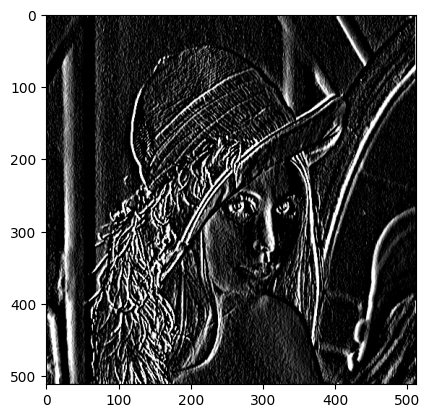

In [21]:
plt.imshow(conv_tor)

### Fill in the added rows and columns with the nearest values

In [22]:
pad_near= np.zeros((m+2, n+2, 3), dtype ="int32")

In [23]:
for i in range(1, m+1):
    for j in range(1,n+1):
        pad_near[i, j] = img[i-1,j-1]

In [24]:
pad_near[0, :] = pad_near[1, :]

pad_near[m+1, :] = pad_near[m, :]

pad_near[:, 0] = pad_near[:, 1]

pad_near[:, n+1] = pad_near[:, n]

In [25]:
pad_near[0, :]

array([[226, 137, 125],
       [226, 137, 125],
       [226, 137, 125],
       ...,
       [221, 130, 110],
       [200,  99,  90],
       [200,  99,  90]], dtype=int32)

In [26]:
conv_near = np.zeros((m, n, 3), dtype = "int32")

In [27]:
for i in range(m):
    for j in range(n):
        subpatch = pad_near[i:i+3, j:j+3]
        res = subpatch*k
        summation = np.sum(res)
        conv_near[i,j] = summation 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2001..1849].


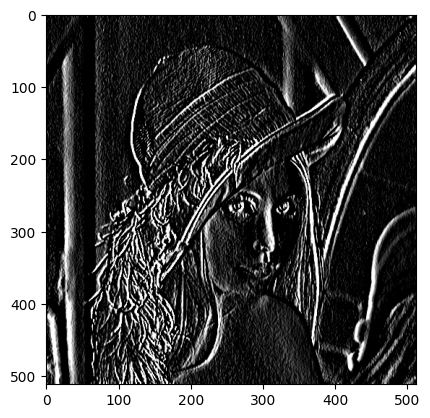

In [31]:
plt.imshow(conv_near)

### Example

In [ ]:
r = np.random.randint(1, 10, (5, 5, 3), dtype="uint8")

r

array([[[1, 4, 7],
        [5, 4, 6],
        [8, 4, 9],
        [9, 7, 6],
        [4, 6, 6]],

       [[7, 2, 7],
        [4, 1, 7],
        [6, 3, 4],
        [3, 2, 3],
        [1, 1, 2]],

       [[9, 8, 4],
        [1, 2, 3],
        [5, 9, 3],
        [1, 6, 8],
        [8, 5, 4]],

       [[8, 1, 6],
        [4, 4, 4],
        [2, 9, 1],
        [4, 8, 6],
        [2, 3, 8]],

       [[1, 3, 8],
        [2, 5, 7],
        [7, 7, 8],
        [5, 8, 5],
        [3, 9, 3]]], dtype=uint8)

In [ ]:
k

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [ ]:
r_zero = np.zeros((7, 7, 3), dtype = "uint8")

In [ ]:
for i in range(1, 6):
    for j in range(1,6):
        r_zero[i, j] = r[i-1,j-1]

In [ ]:
r_zero

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 4, 7],
        [5, 4, 6],
        [8, 4, 9],
        [9, 7, 6],
        [4, 6, 6],
        [0, 0, 0]],

       [[0, 0, 0],
        [7, 2, 7],
        [4, 1, 7],
        [6, 3, 4],
        [3, 2, 3],
        [1, 1, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [9, 8, 4],
        [1, 2, 3],
        [5, 9, 3],
        [1, 6, 8],
        [8, 5, 4],
        [0, 0, 0]],

       [[0, 0, 0],
        [8, 1, 6],
        [4, 4, 4],
        [2, 9, 1],
        [4, 8, 6],
        [2, 3, 8],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 3, 8],
        [2, 5, 7],
        [7, 7, 8],
        [5, 8, 5],
        [3, 9, 3],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
r_conv = np.zeros((5, 5, 3), dtype ="uint8")

In [ ]:
for i in range(5):
    for j in range(5):
        subpatch = r_zero[i:i+3, j:j+3]
        res = subpatch*k
        summation = np.sum(res)
        r_conv[i,j] = summation 

In [ ]:
r_conv

array([[[ 32,  32,  32],
        [  7,   7,   7],
        [  7,   7,   7],
        [242, 242, 242],
        [217, 217, 217]],

       [[ 40,  40,  40],
        [  4,   4,   4],
        [ 20,  20,  20],
        [238, 238, 238],
        [196, 196, 196]],

       [[ 37,  37,  37],
        [  0,   0,   0],
        [ 20,  20,  20],
        [236, 236, 236],
        [199, 199, 199]],

       [[ 43,  43,  43],
        [ 16,  16,  16],
        [ 30,  30,  30],
        [242, 242, 242],
        [183, 183, 183]],

       [[ 35,  35,  35],
        [ 19,  19,  19],
        [ 17,  17,  17],
        [246, 246, 246],
        [204, 204, 204]]], dtype=uint8)